# Emotional and Personal Health

Dharma Teja Bhattu and Collin Stratton

CST-440

Dr. Isac Artzi

4/10/2022

# Introduction


## Psychosocial Burden of Obesity


## Hypothesis Tests


# Code Overview


In [50]:
# imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Data Explanation


In [51]:
# read in data
obesityDF = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv', header=0, usecols=['NObeyesdad'])
connectionsDF = pd.read_csv('ObesityDataSet.csv', header=None)

# convert connectionsDF to numpy array
connectionsArray = connectionsDF.to_numpy()

# get labels from obesity dataset
labelDict = {}

for i in range(0, len(connectionsArray)):
    for j in range(0, len(connectionsArray[i])):
        labelDict[connectionsArray[i][j]] = obesityDF['NObeyesdad'][connectionsArray[i][0]]

## Data Visualization


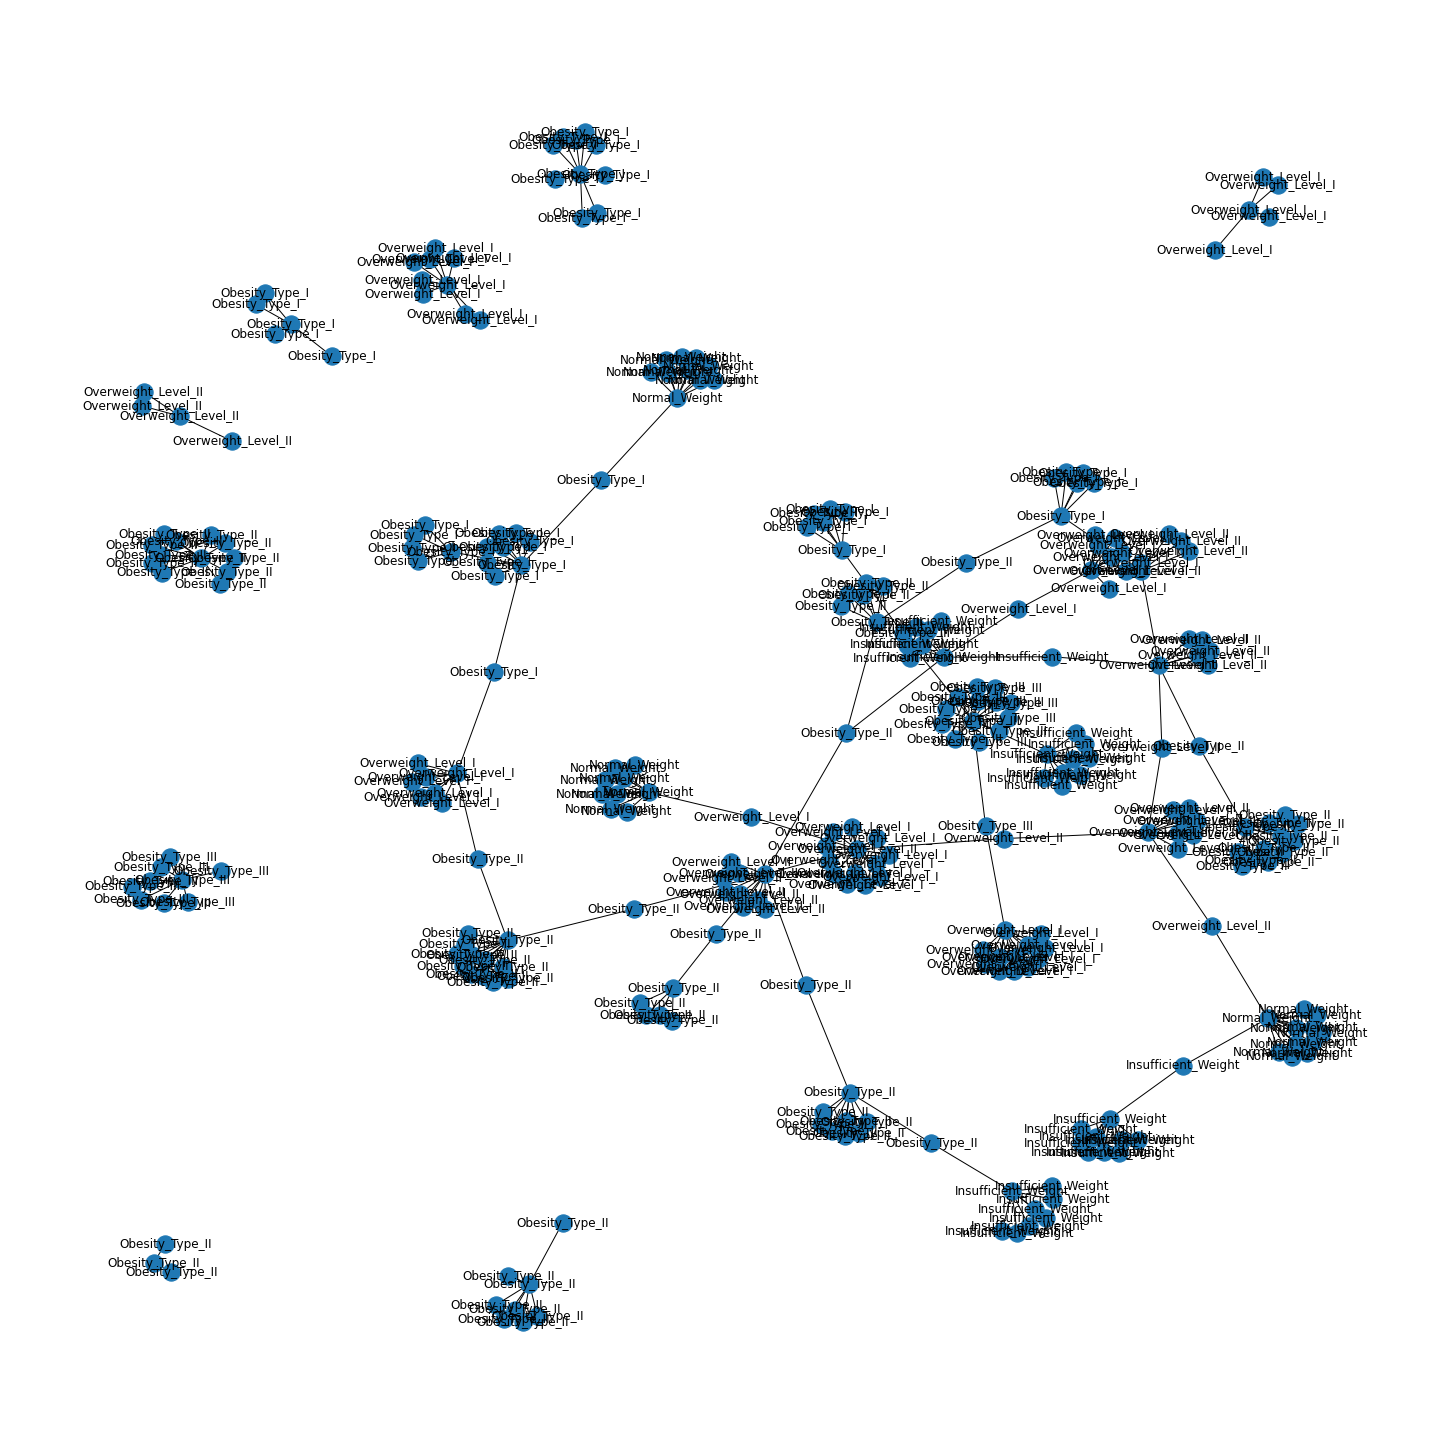

In [52]:
# create graph from connections
G = nx.Graph()
G.add_edges_from(connectionsArray)

# create a plot
plt.figure(figsize=(20,20))

# draw graph
nx.draw(G, labels=labelDict, with_labels=True)

## Analysis of the Graph


## Further Analysis


In [67]:
cen = nx.degree_centrality(G)
# print(type(cen))

# replace all the keys with label dict values
for key in cen:
    if labelDict[key] in cen:
        if cen[key] > cen[labelDict[key]]:
            cen[labelDict[key]] = cen.pop(key)
            # cen.pop(key)
    else:
        cen[labelDict[key]] = cen.pop(key)

print(cen)

RuntimeError: dictionary changed size during iteration

In [ ]:
import json

# find the density and centrality of the graph
den = nx.density(G)
incen = nx.in_degree_centrality(G)
outcen = nx.out_degree_centrality(G)
cen = nx.degree_centrality(G)

# change dict numbers to names
for i in range(len(labelDict.keys())):
    incen[i] = labelDict[i]
    # incen[header_dict[i]] = incen.pop(i)
    # outcen[header_dict[i]] = outcen.pop(i)
    # cen[header_dict[i]] = cen.pop(i)

# print the results
print("In-degree centrality: ", json.dumps(incen, indent=4))
print("Out-degree centrality: ", json.dumps(outcen, indent=4))
print("Degree centrality: ", json.dumps(cen, indent=4))

print("\n")
print("Density: ", json.dumps(den, indent=4))
print("\n")

print("Strongest In-degree is", max(incen, key=incen.get), "with centrality:\t", max(incen.values()))
print("Strongest Out-degree is", max(outcen, key=outcen.get), "with centrality:\t", max(outcen.values()))
print("Strongest Degree is", max(cen, key=cen.get), "with centrality:\t\t", max(cen.values()))

# Conclusion


# References
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6052856/
https://www.kaggle.com/code/mpwolke/obesity-levels-life-style/notebook
